# Project Milestone - Personal World Happiness

### Step 1a: Planning 

I am planning to use data from [world_happiness_ranking_2017.csv](world_happiness_ranking_2017.csv) published by the UN based on surveys from Gallop polling. 

Each data row contains values for:
- Country
- Happiness Rank
- Happiness Score
- Whisker High (of Happiness Score)
- Whisker Low (of Happiness Score)
- Economy GDP per Capita score
- Family score
- Health Life Expectancy sore
- Freedom score
- Generosity score
- Trust in Government score
- Dyptopia Residual score

The scores do not have units but rather represent a value scoring system from 0 to 10 based on that country's respective survey responses. Individual value scores all add up to account for the overall happiness score. 

For my project I will only need the following values:
- Country
- Happiness Rank
- Happiness Score
- Economy GDP per Capita score
- Family score
- Health Life Expectancy sore
- Freedom score
- Generosity score
- Trust in Government score


### Step 1b: Planning 
#### Write a description of what your program will produce

For this project, my goal is to return a recompiled ranking of the happiest countries in the world based on what value(s) are most important to the user. 

Idea #1:
Producing a pie graph of the top 5 countries that match the user's most important value, with the size of each slice representing how strong 

Idea #2:
Producing a bar chart showing each country's relative score of the user's most important value. For example, if the user's most important value is family then the bar chart would show the top 5 country's that have the highest family scores.

Idea #3:
Producing a scatterplot showing all the countries in the list based on what value is most important to the user. Each dot would represent a country and the y-axis would represent that country's score from 0 to 10 for the selected value. 

Idea #4 (extended target goal):
Producing a hybird data visualization that product from a ranked list of the user's top 5 countries. This text list is visually linked to a box-value graph of the intensity of the selected matching value in the overall scoring system. 

My first goal is to produce a graph based on 1 selected value that is most important to the user (family, gov't, etc) of their top 5 countries. 

If I accomplish this then I will attempt to produce a hybird graph (Idea#4). 

If I accomplish this then I will explore trying to produce a graph based on multiple values that are most important to the user (family and gov't OR economy and health, for example)

If I accomplish this then I will pursue my original project of recalcuating the overall happiness scores of all countries based on the user's preference (from a 0 to 10 scale) of each of the six values, in order to produce a chart that includes all 156 countries. 

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

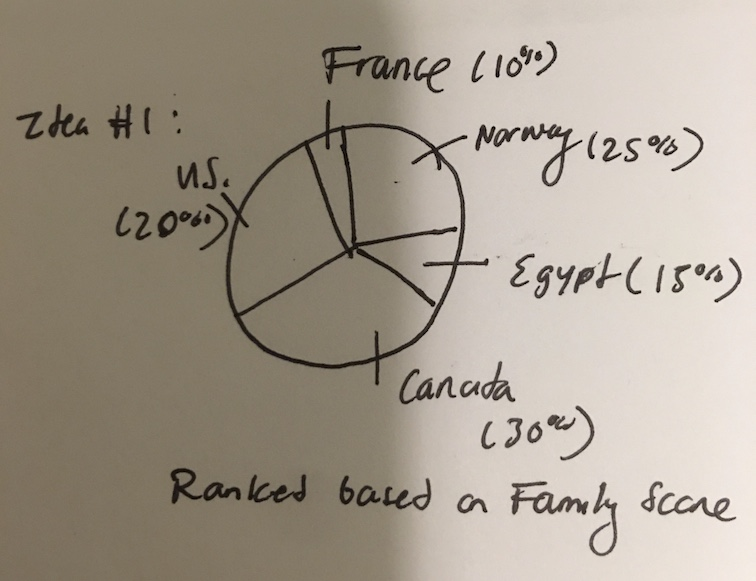
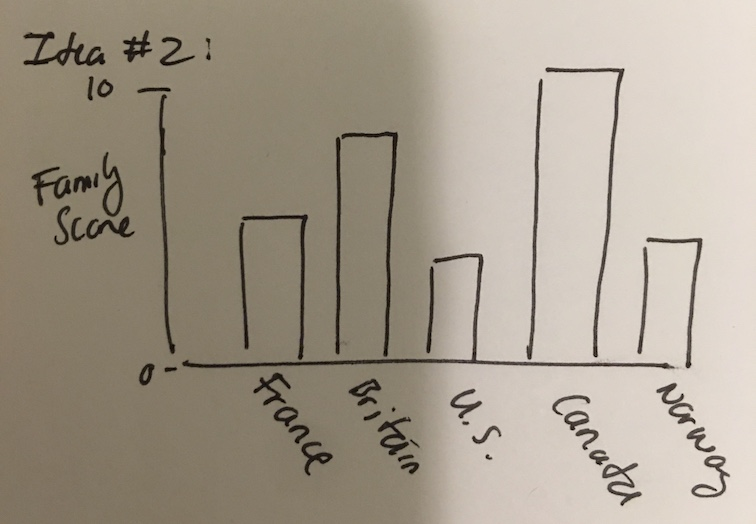
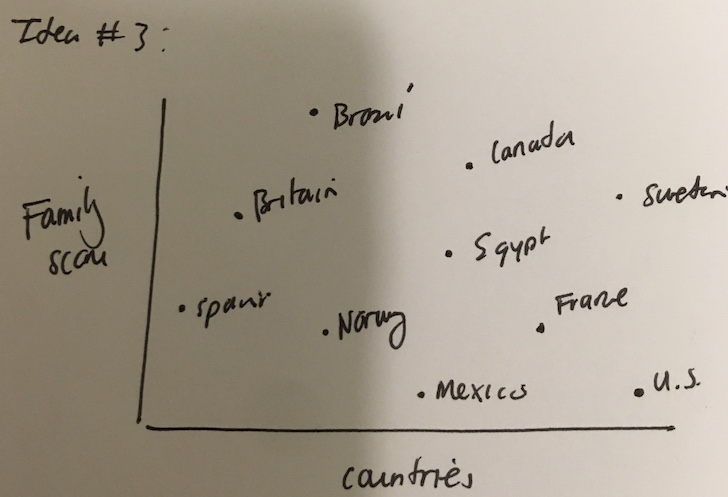
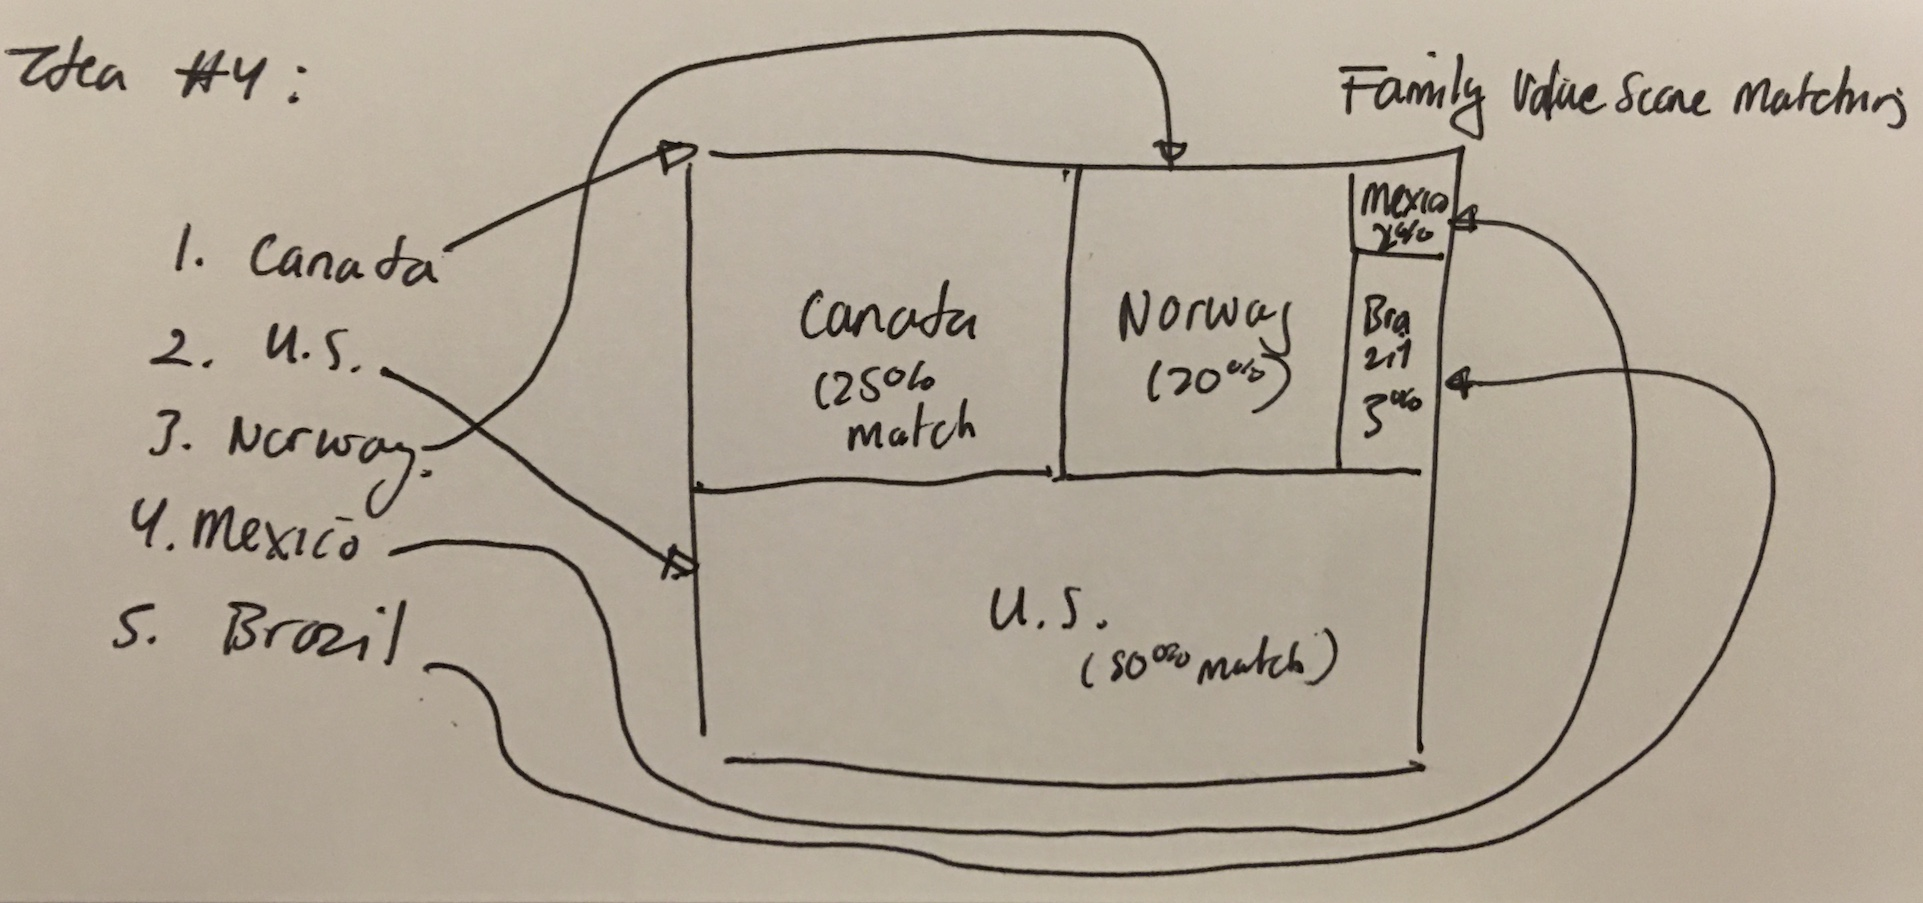

### Step 2a: Building
#### Design data definitions

I will need to use all six value scores for each country in the data set: economy, family, health, freedom, generosity, trust. All the values need to be included because it is up to the user to decide which value(s) are most important to them. 

I will need the country name value to represent that compound data point in the produced graph. This is the most important information since it will help directly answer the main question in the project proposal: "which country(ies) would best suit me to be the happiest?" AND "would make happiness world ranking list differ from the UN's ranking list?"

The original ranking could be used as a helpful comparison to see quantatively how much the new personalized happiness rankings differ from the original rankings. 

I will need to use a compound data definition for each country to incorporate all these values and I will need an arbitrary number of country compound values in that list. 


In [6]:
from cs103 import *
from typing import NamedTuple, List
import csv

##################
# Data Definitions

WHData = NamedTuple('WHData', [('country', str),
                                 ('ranking', int),
                                 ('happyscore', float),
                                 ('economy', float),
                                 ('family', float),
                                 ('health', float),
                                 ('freedom', float),
                                 ('generosity', float),
                                 ('trust', float)])

# interp. a WHData (World Happiness Data) type includes the country's name (country), original happiness ranking (ranking),
#, original happiness score, economy GDP per capita score, family score, health score, freedom score, generosity score, 
#and trust in government score. All scores have no units and have a set range [0, 10]. All scores add up to the overall happiness score. 

WHD1 = WHData('Norway', 1, 7.537000179, 1.616463184, 1.53352356, 0.796666503, 0.635422587, 0.362012237, 0.315963835)
WHD2 = WHData('Denmark', 2, 7.521999836, 1.482383013, 1.551121593, 0.792565525, 0.626006722, 0.355280489, 0.400770068)

@typecheck
def fn_for_wh_data(whd: WHData) -> ...: #template based on compound
    return ... (whd.country,
               whd.ranking,
               whd.happyscore,
               whd.economy,
               whd.family,
               whd.health,
               whd.freedom,
               whd.generosity,
               whd.trust)

# List[WH_Data]
# interp. a list of World Happiness Data types

LOWHD0 = []
LOWHD1 = [WHD1]
LOWHD2 = [WHD1, WHD2]

@typecheck
def fn_for_lowhd(lowhd: List[WHData]) -> ...: #template based on arbitrary size and reference rule
    acc = ... # type: ...
    for whd in lowhd:
        acc = ... (acc, fn_for_wh_data(wd))
    return ... (acc)


### Step 2b: Building
#### Design a function to read the information and store it as data in your program

Complete this step in the code cell below. 

In [11]:

@typecheck
def read(filename: str) -> List[WHData]:
    """    
    reads information from the specified file and returns a list of WHData values (World Happiness Data type)
    """
    #return []  #stub
    # Template from HtDAP
    # lowhd contains the list of WHData so far
    lowhd = [] # type: List[WHData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            whd = WHData(row[0], parse_int(row[1]), parse_float(row[2]), parse_float(row[5]), parse_float(row[6]), parse_float(row[7]), parse_float(row[8]), parse_float(row[9]), parse_float(row[10]))
            lowhd.append(whd)
    
    return lowhd


start_testing()
expect(read('world_happiness_ranking_2017_test1.csv'), [WHData('Norway', 1, 7.537000179, 1.616463184, 1.53352356, 0.796666503, 0.635422587, 0.362012237, 0.315963835)])
expect(read('world_happiness_ranking_2017_test2.csv'), [WHData('Norway', 1, 7.537000179, 1.616463184, 1.53352356, 0.796666503, 0.635422587, 0.362012237, 0.315963835), WHData('Denmark', 2, 7.521999836, 1.482383013, 1.551121593, 0.792565525, 0.626006722, 0.355280489, 0.400770068)])
summary()

2 of 2 tests passed
